## ESTADISTICA I 

En este caso vamos a darle un giro de tuerca a la forma en la que se ha resuelto los ejercicios de la Pair de hasta ahora! Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De esta forma vamos a estudiar los diferentes estadísiticos que contiene en dataset seleccionado Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

1. Buscar un conjunto de datos a analizar:  
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas. Ya que también se analizarán.

In [3]:
# Importamos las librerias necesarias
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

`Hemos seleccionado un dataset que trae como informacion el ranking de las 1000 cuentas de Instagram mas importantes a nivel mundial.`


In [4]:
# Descargamos los datos
df=pd.read_csv('instagram_global_top_1000.csv',index_col=0).reset_index()
df.tail(3)# visualizamos los ultimos tres registros

,rank,account,title,link,category,followers,audience_country,authentic_engagement,engagement_avg,scraped
997,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000.0,India,176500.0,239800.0,2022-02-07 16:50:24.798803
998,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0,175500.0,2022-02-07 16:50:24.798803
999,1000,eduincaz,Eduin Caz,https://www.instagram.com/eduincaz/,Lifestyle,6200000.0,Mexico,305600.0,391900.0,2022-02-07 16:50:24.798803


In [5]:
df.shape #`El mismo esta compuesto por 1000 filas y 10 columnas.`

(1000, 10)

In [6]:
df.columns # Las columnas que lo componen son:

Index(['rank', 'account', 'title', 'link', 'category', 'followers',
       'audience_country', 'authentic_engagement', 'engagement_avg',
       'scraped'],
      dtype='object')

In [7]:
#arreglamos los nombres de las columnas para trabajar mas facilmente
cambio_columnas = {col :  col.lower().strip().replace(' ','_') for col in df.columns}

In [8]:
df.rename(columns=cambio_columnas, inplace=True)

In [9]:
df.columns # Verificamos las modificaciones.

Index(['rank', 'account', 'title', 'link', 'category', 'followers',
       'audience_country', 'authentic_engagement', 'engagement_avg',
       'scraped'],
      dtype='object')

In [10]:
df.info() # Analizamos la informacion que compone cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  1000 non-null   int64  
 1   account               1000 non-null   object 
 2   title                 983 non-null    object 
 3   link                  1000 non-null   object 
 4   category              909 non-null    object 
 5   followers             1000 non-null   float64
 6   audience_country      993 non-null    object 
 7   authentic_engagement  1000 non-null   float64
 8   engagement_avg        1000 non-null   float64
 9   scraped               1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [11]:
df.isnull().sum() #verificamos los nulos

rank                     0
account                  0
title                   17
link                     0
category                91
followers                0
audience_country         7
authentic_engagement     0
engagement_avg           0
scraped                  0
dtype: int64

In [12]:
df.duplicated().sum() # verificamos que no hay ninguna fila duplicada.

0

In [13]:
df.describe() # vemos los prncipales estadisticos de las variables numericas.

,rank,followers,authentic_engagement,engagement_avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,2.483610e+07,6.491228e+05,8.653886e+05
std,288.819436,3.872143e+07,1.098804e+06,1.267515e+06
min,1.000000,2.800000e+06,0.000000e+00,5.200000e+04
25%,250.750000,9.000000e+06,2.091000e+05,3.086000e+05
50%,500.500000,1.440000e+07,3.637000e+05,5.239000e+05
75%,750.250000,2.565000e+07,6.832500e+05,9.508000e+05
max,1000.000000,4.696000e+08,1.340000e+07,1.340000e+07


In [14]:
df.describe(include='object') # vemos los estadisticos de las variables categoricas.

,account,title,link,category,audience_country,scraped
count,1000,983,1000,909,993,1000
unique,1000,982,1000,165,31,1
top,cristiano,НАСТЯ ИВЛЕЕВА,https://www.instagram.com/cristiano/,Music,United States,2022-02-07 16:50:24.798803
freq,1,2,1,170,283,1000


In [15]:
df['category'].unique()# vemos que valores unicos tenemos en la columna 'category'

array(['Sports with a ball', 'Fashion|Modeling|Beauty',
       'Sports with a ball|Family', 'Modeling|Fashion', 'Music|Lifestyle',
       'Cinema|Actors/actresses|Fashion', 'Fashion|Beauty',
       'Music|Fashion', 'Music', 'Cinema|Actors/actresses', nan,
       'Clothing|Outfits|Lifestyle', 'Music|Beauty',
       'Cinema|Actors/actresses|Fitness|Gym', 'Photography', 'Lifestyle',
       'Beauty', 'Music|Cinema|Actors/actresses', 'Modeling|Lifestyle',
       'Finance|Economics|Business|Careers', 'Lifestyle|Shows',
       'Lifestyle|Fashion|Clothing|Outfits', 'Art|Artists',
       'Beauty|Art|Artists|Cinema|Actors/actresses',
       'Cinema|Actors/actresses|Modeling', 'Humor|Fun|Happiness',
       'Lifestyle|Modeling', 'Cinema|Actors/actresses|Modeling|Lifestyle',
       'Family|Sports with a ball', 'Fitness|Gym|Lifestyle',
       'Science|Photography', 'Modeling',
       'Cinema|Actors/actresses|Art|Artists', 'Music|Modeling',
       'Literature|Journalism|Cinema|Actors/actresses|Fashio

In [16]:
df['audience_country'].value_counts() #Realizamnos el conteo por paises.

United States           283
Brazil                  161
India                   143
Indonesia               130
Mexico                   50
Spain                    34
Russia                   30
Argentina                24
Iran                     17
United Kingdom           17
Turkey                   16
Italy                    15
South Korea              13
Colombia                  9
Philippines               7
France                    6
Egypt                     6
Germany                   5
Nigeria                   4
Thailand                  4
Iraq                      4
Morocco                   3
Japan                     2
Saudi Arabia              2
Kazakhstan                2
Syria                     1
China                     1
Algeria                   1
United Arab Emirates      1
Poland                    1
Chile                     1
Name: audience_country, dtype: int64

2. Extraer los siguentes estadísiticos del conjunto de datos para varias de las variables disponibles:

`Vamos a realizar el analisis de la columna "followers"(seguidores) y "authentic_engagement" (reacciones/interacciones) que son de tipo numericas.`

### Media


In [43]:
media_seguidores=df['followers'].mean()
print(f'La media de seguidores es  de {media_seguidores} seguidores')

La media de seguidores es  de 24836100.0 seguidores


In [45]:
media_reacciones=df['authentic_engagement'].mean()
print(f'La media de reacciones es  de {media_seguidores} interacciones')


La media de reacciones es  de 24836100.0 interacciones


In [19]:
df.sort_values( by='authentic_engagement',axis=0)

,rank,account,title,link,category,followers,audience_country,authentic_engagement,engagement_avg,scraped
937,938,dukeandduchessofcambridge,Duke and Duchess of Cambridge,https://www.instagram.com/dukeandduchessofcamb...,Family|Finance|Economics,13500000.0,NaN,0.0,191800.0,2022-02-07 16:50:24.798803
475,476,aboflah,AboFlah,https://www.instagram.com/aboflah/,Humor|Fun|Happiness,7200000.0,NaN,0.0,946800.0,2022-02-07 16:50:24.798803
727,728,joshu_acoustic,Joshua Hong,https://www.instagram.com/joshu_acoustic/,Music,3800000.0,NaN,0.0,969200.0,2022-02-07 16:50:24.798803
770,771,lomon991111,Lomon 991111,https://www.instagram.com/lomon991111/,NaN,3500000.0,NaN,0.0,987300.0,2022-02-07 16:50:24.798803
691,692,snoopdogg,snoopdogg,https://www.instagram.com/snoopdogg/,Lifestyle|Music,67700000.0,United States,38300.0,57600.0,2022-02-07 16:50:24.798803
...,...,...,...,...,...,...,...,...,...,...
31,32,rkive,RM,https://www.instagram.com/rkive/,NaN,28000000.0,NaN,8900000.0,8900000.0,2022-02-07 16:50:24.798803
20,21,thv,V,https://www.instagram.com/thv/,NaN,34100000.0,NaN,10400000.0,10400000.0,2022-02-07 16:50:24.798803
26,27,agustd,SUGA of BTS 민윤기,https://www.instagram.com/agustd/,NaN,27900000.0,NaN,10600000.0,10600000.0,2022-02-07 16:50:24.798803
25,26,jin,Jin of BTS,https://www.instagram.com/jin/,NaN,28400000.0,United States,11100000.0,11100000.0,2022-02-07 16:50:24.798803


### Maximo

In [46]:
max_seguidores =df['followers'].max()
print(f'La cuenta con mayor cantidad de followers tiene {max_seguidores} seguidores')


La cuenta con mayor cantidad de followers tiene 469600000.0 seguidores


In [49]:
max_reacciones =df['authentic_engagement'].max()
print(f'La mayor cantidad de reacciones fue de {max_reacciones} interacciones')

La mayor cantidad de reacciones fue de 13400000.0 interacciones


### Minimo

In [50]:
min_seguidores =df['followers'].min()
print(f'La cuenta con menor cantidad de followers tiene {min_seguidores} seguidores')

La cuenta con menor cantidad de followers tiene 2800000.0 seguidores


In [51]:
min_reacciones =df['authentic_engagement'].min()
print(f'La menor cantidad de reacciones fue de {min_reacciones} interacciones')

La menor cantidad de reacciones fue de 0.0 interacciones


### Desviación con respecto de la media

In [24]:
media=df['followers'].mean()
diferencias=df['followers']-media
#desviacion_media=np.abs(diferencias)
#desviacion_media
diferencias
#desviacion del numero de seguidores por cuenta respecto del valor medio de seguidores, hemos retirado el np.abs, 
# para confirmar las sospechas de distribucion de seguidores

0      375263900.0
1      283963900.0
2      281463900.0
3      192963900.0
4      270963900.0
          ...     
995    -17136100.0
996    -13336100.0
997    -14736100.0
998    -11136100.0
999    -18636100.0
Name: followers, Length: 1000, dtype: float64

In [25]:
media2=df['authentic_engagement'].mean()
diferencias2=df['authentic_engagement']-media
desviacion_media2=np.abs(diferencias2)
desviacion_media2



0      17036100.0
1      18636100.0
2      20036100.0
3      21436100.0
4      22136100.0
          ...    
995    24589500.0
996    24689600.0
997    24659600.0
998    24689700.0
999    24530500.0
Name: authentic_engagement, Length: 1000, dtype: float64

### Varianza

In [26]:
var_seguidores =df['followers'].var()
print(f'La varianza de seguidores es de {var_seguidores}.')

La varianza de seguidores es de 1499349496286270.5.


In [27]:
var_reacciones=df['authentic_engagement'].var()
print(f'La varianza de reacciones es de {var_reacciones}.')

La varianza de reacciones es de 1207369145805.9407.


### Desviación típica

In [28]:
std_seguidores= df['followers'].std()
print(f'La desviacion tipica de seguidores es de {std_seguidores} seguidores.')
#es casi un 15% del valor máximo, y superior a la media

La desviacion tipica de seguidores es de 38721434.58455885 seguidores.


In [52]:
std_reacciones= df['authentic_engagement'].std()
print(f'La desviacion tipica de reacciones es de {std_reacciones} interacciones.')


La desviacion tipica de reacciones es de 1098803.506458703 interacciones.


### Moda

In [54]:
df['followers'].mode()


0    7800000.0
Name: followers, dtype: float64

In [31]:
df['authentic_engagement'].mode()

0    1100000.0
Name: authentic_engagement, dtype: float64

### Mediana


In [55]:
med_seguidores=df['followers'].median()
print(f'La mediana de seguidores es {med_seguidores} seguidores.')

La mediana de seguidores es 14400000.0 seguidores.


In [56]:
med_reacciones = df['authentic_engagement'].median()
print(f'La mediana de reacciones es {med_reacciones} interacciones.')

La mediana de reacciones es 363700.0 interacciones.



### Media ponderada

In [34]:
pesos=np.random.randint(0,100,df.shape[0])
average=np.average(df['followers'], weights=pesos )
print(f'La media ponderada de seguidores es de {average} seguidores')

La media ponderada de seguidores es de 25233549.416373845 seguidores


In [58]:
pesos2=np.random.randint(0,100,df.shape[0])
average2=np.average(df['authentic_engagement'], weights=pesos)
print(f'La media ponderada de reacciones es de {average2} reacciones')

La media ponderada de reacciones es de 644022.5594733228 reacciones


### Robustez


In [62]:
robustez = 1/df.shape[0]
print(f'El indice de robustez de nuestro DataFrame es: {robustez}')

El indice de robustez de nuestro DataFrame es: 0.001


Gracias a las graficas y a el calculo de los demas estadisticos, concluimos que debido a la gran dispersion de datos que hay en las dos categorias 'seguidores' y 'reacciones' la media no es representativa. Por lo que nos parece  que la mediana es un indicador mas robusto para este analisis.

### Coeficiente de variación

#### - Variable Seguidores

In [36]:
cv_seguidores=df['followers'].mean()/df['followers'].std()
print(f'El coeficiente de variacion de seguidores es {cv_seguidores}')


El coeficiente de variacion de seguidores es 0.6414044383031207


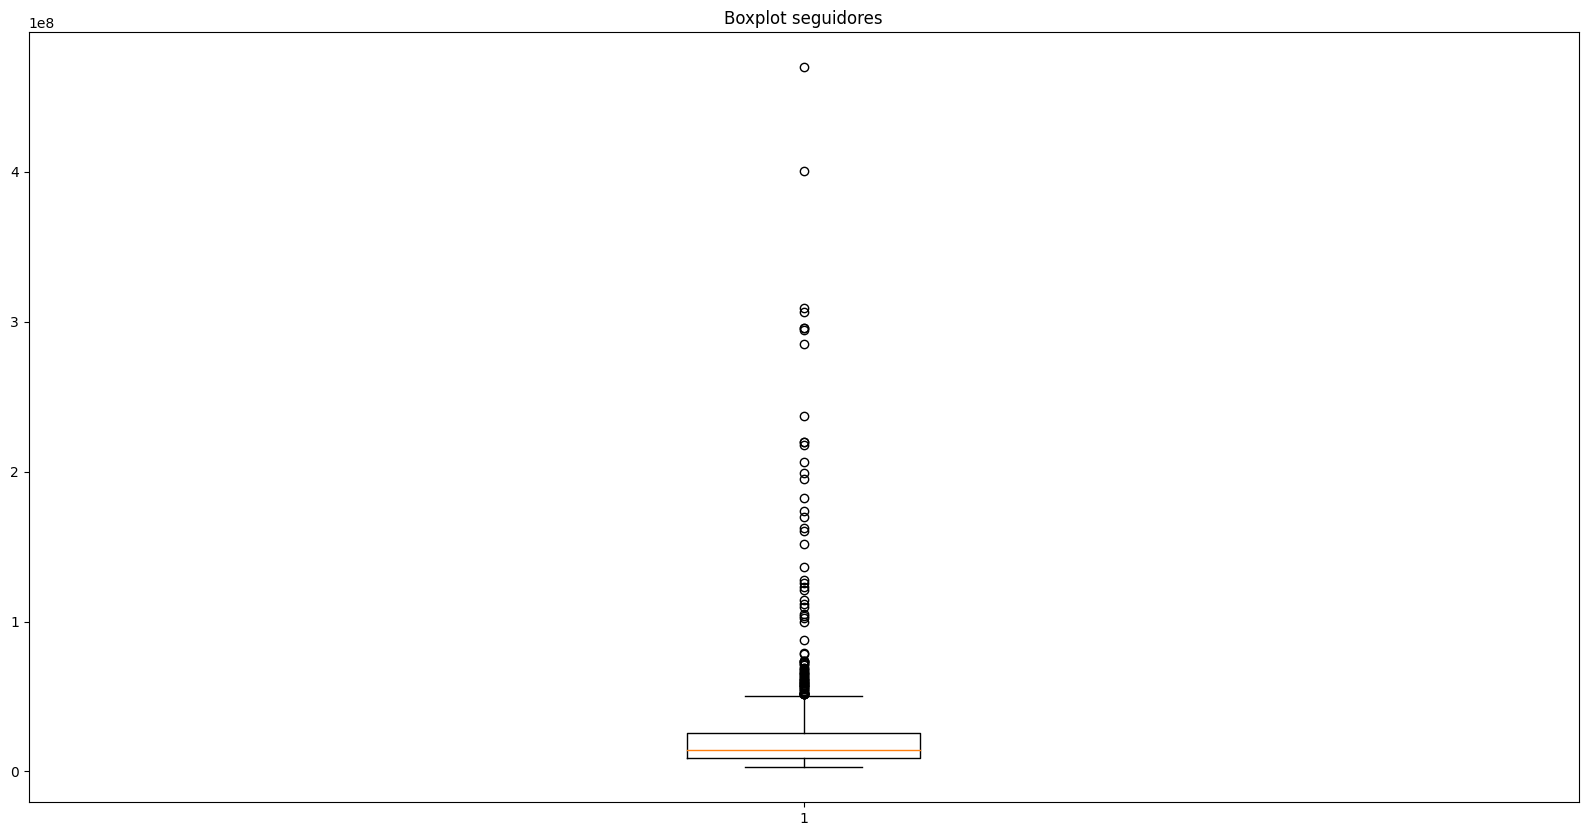

In [66]:
fig=plt.figure(figsize=(20,10))
plt.boxplot(df['followers'])
plt.title('Boxplot seguidores')
plt.show()
#hacemos el boxplot, porque sospechamos que tenemos valores muy heterogeneos, y cuantitativamente muy altos

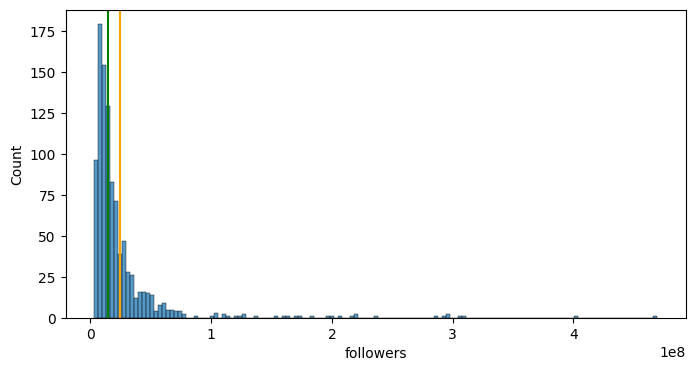

In [38]:
fig=plt.figure(figsize=(8,4))
sns.histplot(df['followers'])
plt.axvline(media_seguidores, color='orange')
plt.axvline(med_seguidores, color='green')
plt.title('')
plt.show()
#intentamos verlo mejor comparando media y mediana.

#### - Variable reacciones/interacciones

In [39]:
coeficiente_variacion=df['authentic_engagement'].mean()/df['authentic_engagement'].std()
print(f' El coeficiente de variacion  de reacciones es de {coeficiente_variacion}')

 El coeficiente de variacion  de reacciones es de 0.5907542123632606


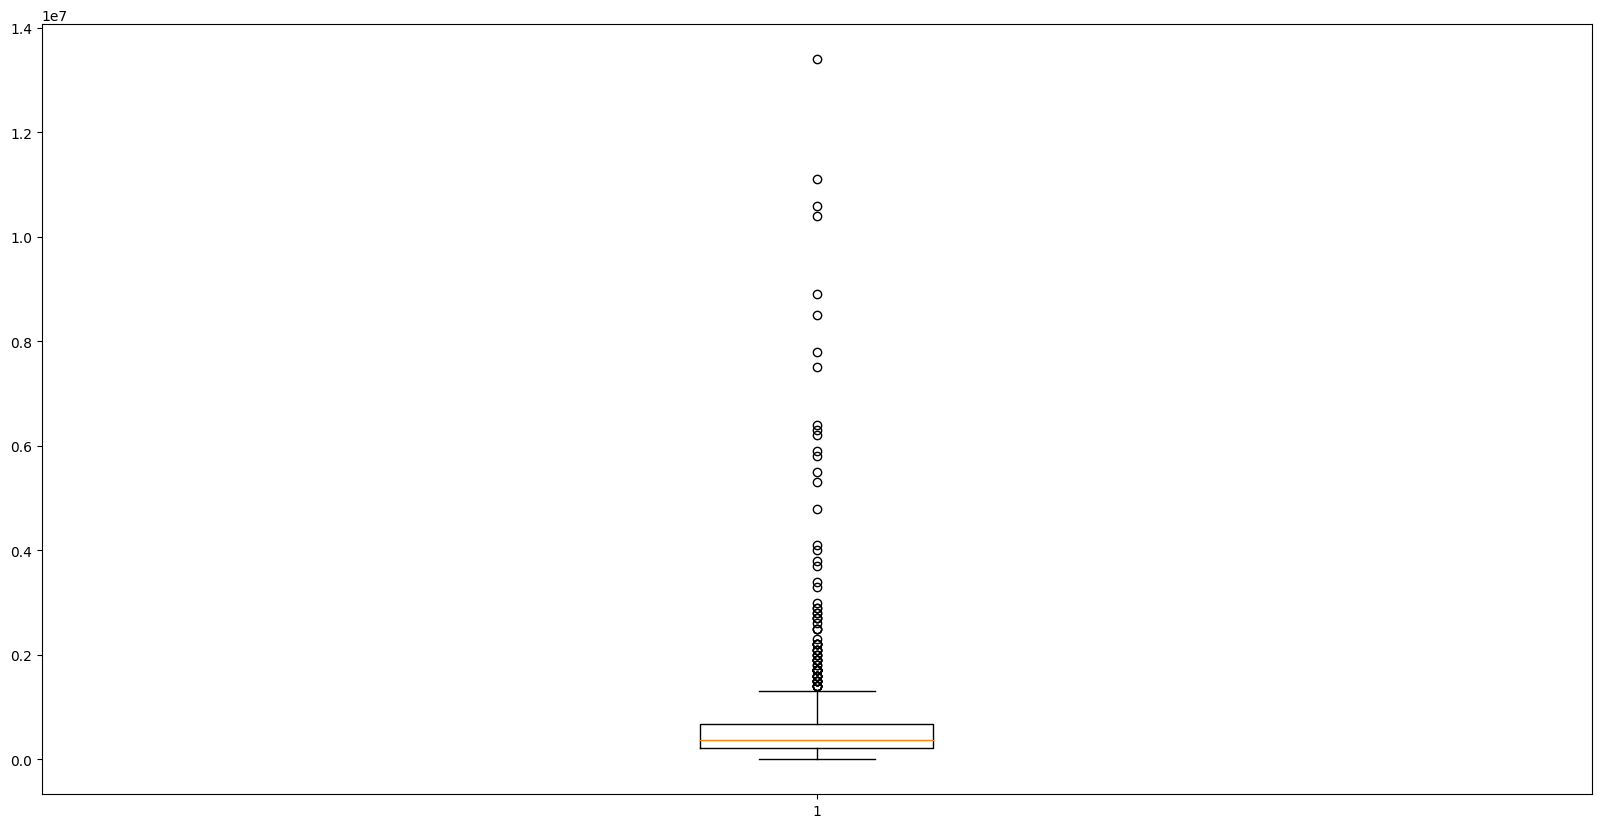

In [40]:
fig=plt.figure(figsize=(20,10))
plt.boxplot(df['authentic_engagement'])
plt.show()

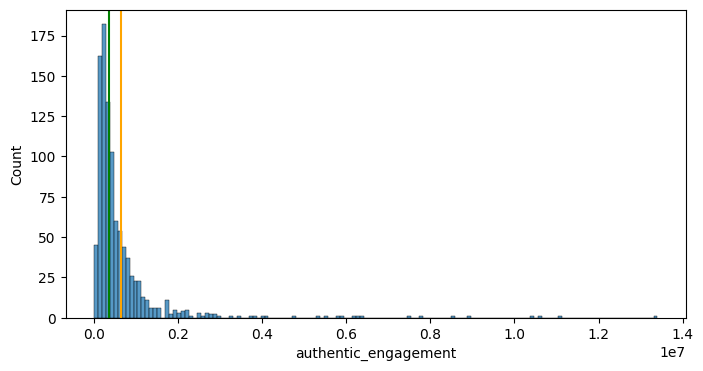

In [41]:
fig=plt.figure(figsize=(8,4))
sns.histplot(df['authentic_engagement'])
plt.axvline(media_reacciones, color='orange')
plt.axvline(med_reacciones, color='green')
plt.show()

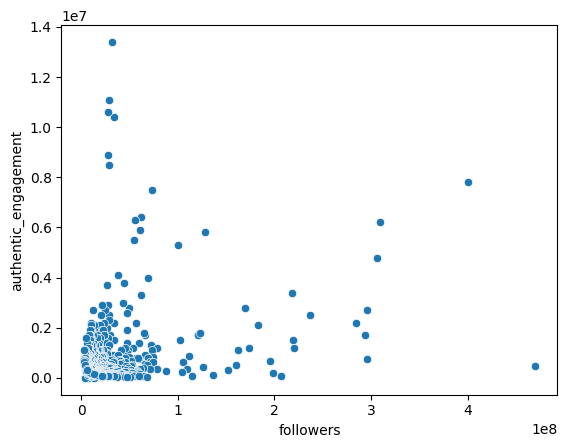

In [42]:
sns.scatterplot(data = df, x = "followers", y = "authentic_engagement");

### 3. Interpretación de los resultados. 
#### Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

- **df['followers']** VARIABLE SEGUIDORES: Analizando los datos, encontramos una distribución muy desigual, la moda y mediana se alejan de la media en mas de 10 millones de seguidores. Teniendo en cuenta los valores maximos y minimos, encontramos una diferencia entre ellos de más del valor de la media. La desviacion estándar muy alta, lo que significa una gran dispersion de datos, tiene un valor de variacion mayor del número minimo de seguidores, valor superior a la media, y supone casi un 15% del valor máximo. Tenemos datos en los que la mayoria de las cuentas de la app tienen muy pocos seguidores respecto de unas pocas que tienen muchos.

- **df['authentic_engagement']** VARIABLE REACCIONES/INTERACCIONES: Como era de esperar, obtenemos datos bastantes similares, aunque tendriamos que confirmarlo viendo si existe una correlación positiva estadística entre el número de followers y el número de "reacciones". Aunque intuitivamente, a mayor cantidad de seguidores, mayor cantidad de reacciones posibles a las publicaciones.